In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
data = np.genfromtxt('/home/dwijay/NOTEBOOKS/Trying_ML/K_means_trial/faithful.csv',delimiter=',')
learn_data = data[1:int(0.8*272)+1,1:]
test_data = data[int(0.8*272)+1:,1:]
print(np.shape(learn_data))

(217, 2)


In [ ]:
plt.scatter(test_data[:,0],test_data[:,1])
plt.show()

In [ ]:
#centroid1 = learn_data[random.randrange(int(0.8*272)),:]
#centroid2 = learn_data[random.randrange(int(0.8*272)),:]
#Put an if statement if they are same rondomize again
centroid1 = np.array([0.05,180.0])
centroid2 = np.array([4.5,50.0])

In [ ]:
print(centroid1,centroid2)

In [ ]:
plt.scatter(np.array([centroid1[0],centroid2[0]]),np.array([centroid1[1],centroid2[1]]))
plt.xlim(0,6)
plt.show()

**K-Means Algo with one data at time**


In [ ]:
Rnk = []
shp = np.shape(learn_data)
k = 2
'''Centroid for testing'''
centroid = np.empty((k,shp[-1]))
for i in range(k):
    for j in range(shp[-1]):
        centroid[i,j] = random.randrange(int(min(learn_data[:,j])),int(max(learn_data[:,j])))


In [ ]:
print(np.array([learn_data[0,:]]*k))

In [ ]:
centroid

In [ ]:
for i in range(shp[0]):
    dist = np.sum(np.square(centroid-np.array([learn_data[i,:]]*k)),axis=-1)
    #print(np.where(dist==min(dist))[0])
    if np.shape(Rnk)[0]!=shp[0]:
        Rnk.append(np.where(dist==min(dist))[0][0])
    else:
        Rnk[i] = np.where(dist==min(dist))[0][0]

Rnk = np.reshape(Rnk,(-1,1))


for j in range(k):
    
    idx = np.where(Rnk == j)[0]
    
    centroid[j,:] = np.sum(learn_data[idx,:],axis= 0)/np.shape(idx)[0]
        
        


In [ ]:
centroid

In [ ]:
array([[ 4.30154412, 80.43382353],
       [ 2.09135802, 54.85185185]])

In [ ]:
idx1 = np.where(Rnk == 0)[0]
idx2 = np.where(Rnk == 1)[0]
plt.scatter(learn_data[idx1,0],learn_data[idx1,1],color = 'red')
plt.scatter(learn_data[idx2,0],learn_data[idx2,1],color = 'green')
plt.scatter(np.array([centroid[0,0],centroid[1,0]]),np.array([centroid[0,1],centroid[1,1]]),marker='*', s=300,c='b', label='centroid')
plt.show()

In [ ]:
print(centroid1,centroid2)

In [ ]:
class k_means():
    def __init__(self):
        '''
        This class implements K-means algoritm.
        
        To train the model call fit() function.
        
        To Predict call predict() function.
        
        '''
        pass
        
    
    def Search_Rnk(self,learn_data,shp,first = 0):
        
        if first==0:
            self.Rnk = []
            self.centroid = np.empty((self.k,shp[-1]))
            for i in range(self.k):
                for j in range(shp[-1]):
                    self.centroid[i,j] = random.randrange(int(min(learn_data[:,j])),int(max(learn_data[:,j])))

        
        
        for i in range(shp[0]):
            dist = np.sum(np.square(self.centroid-np.array([learn_data[i,:]]*self.k)),axis=-1)
            
            if np.shape(self.Rnk)[0]!=shp[0]:
                self.Rnk.append(np.where(dist==min(dist))[0][0])
            else:
                self.Rnk[i] = np.where(dist==min(dist))[0][0]

        self.Rnk = np.reshape(self.Rnk,(-1,1))
    
    def Find_Centroids(self,learn_data):
        
        for j in range(self.k):
    
            idx = np.where(self.Rnk == j)[0]
    
            self.centroid[j,:] = np.sum(learn_data[idx,:],axis= 0)/np.shape(idx)[0]
    
    def fit(self,X,k,iteration):
        
        self.k = k
        self.made_cluster = 1
        
        for i in range(iteration):
            
            self.Search_Rnk(learn_data=X,shp = np.shape(X),first = i)
            
            self.Find_Centroids(learn_data=X)
            
    def predict(self,data):
        
        try:
            test = self.made_cluster
        except:
            print('You need to train the model first..........')
        else:
            
            pred_Rnk = []
            
            shp = np.shape(data)
            
            for i in range(shp[0]):
                dist = np.sum(np.square(self.centroid-np.array([data[i,:]]*self.k)),axis=-1)
            
                pred_Rnk.append(np.where(dist==min(dist))[0][0])

            pred_Rnk = np.reshape(pred_Rnk,(-1,1))
            
            return pred_Rnk
            
            
            
        

        


In [ ]:
K = k_means()

In [ ]:
K.fit(learn_data,2,5)

In [ ]:
learn_data[0:1]

In [ ]:
np.array([[2.,80.]])

In [ ]:
pred = K.predict(np.array([[4.,80.]]))
print(pred,learn_data[0])

In [ ]:
idx1 = np.where(K.Rnk == 0)[0]
idx2 = np.where(K.Rnk == 1)[0]
plt.scatter(learn_data[idx1,0],learn_data[idx1,1],color = 'red')
plt.scatter(learn_data[idx2,0],learn_data[idx2,1],color = 'green')
plt.scatter(np.array([K.centroid[0,0],K.centroid[1,0]]),np.array([K.centroid[0,1],K.centroid[1,1]]),marker='*', s=300,c='b', label='centroid')
plt.show()

In [5]:
from K_means_distance import *

In [6]:
A = k_means()
A.fit(learn_data,2,5)

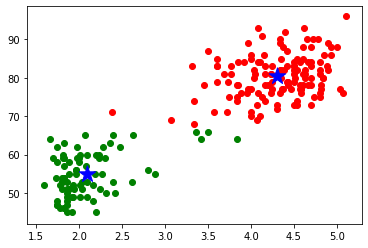

In [7]:
idx1 = np.where(A.Rnk == 0)[0]
idx2 = np.where(A.Rnk == 1)[0]
plt.scatter(learn_data[idx1,0],learn_data[idx1,1],color = 'red')
plt.scatter(learn_data[idx2,0],learn_data[idx2,1],color = 'green')
plt.scatter(np.array([A.centroid[0,0],A.centroid[1,0]]),np.array([A.centroid[0,1],A.centroid[1,1]]),marker='*', s=300,c='b', label='centroid')
plt.show()